# Create Environment

In [1]:
from gym_marbic import *
import copy

In [2]:
env = CorporateBiodiversityEnv(
    grid_size=50,
    n_species=10,
    carrying_capacity=25,
    disturbance=0.0,
    min_age=3,
    max_age=5,
    max_age_sort=False,
    lat_steep=0.1,
    disp_rate=0.45,
    n_corporations=3,
    n_investors=2,
    max_steps=1e6,
    half=True,
    birth_first=True,
    seed=42
)

In [3]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [5 3 5 5 3 3 5 4 5 5]
10/10 init species 0 (7679 ind.) 🌲

Before dynamics:


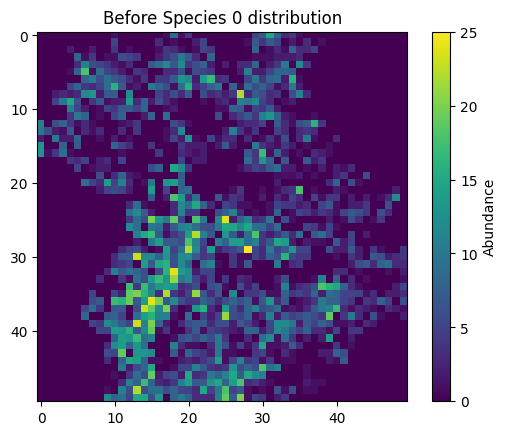

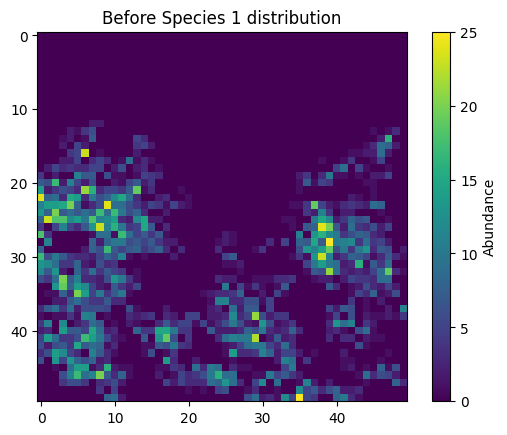

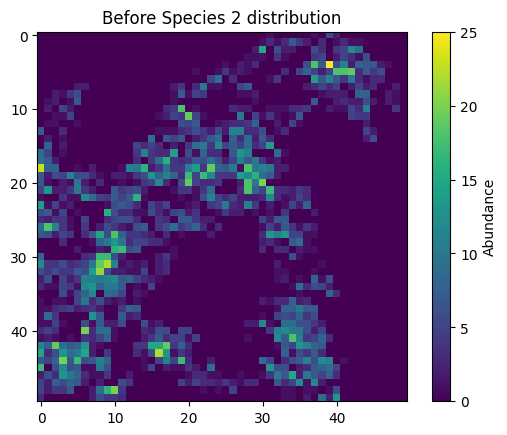

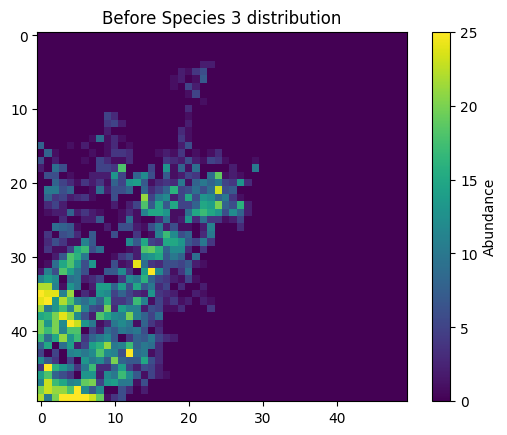

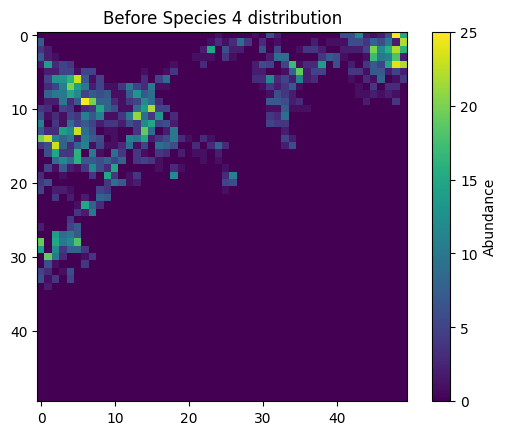

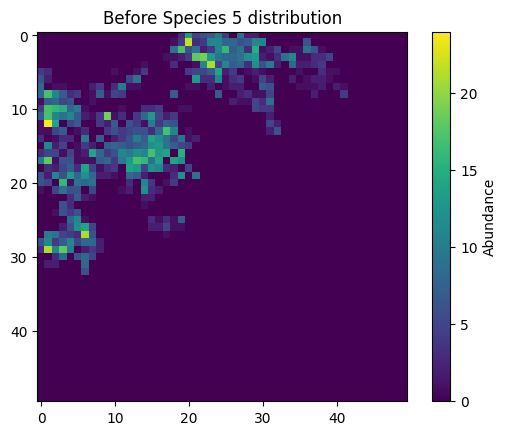

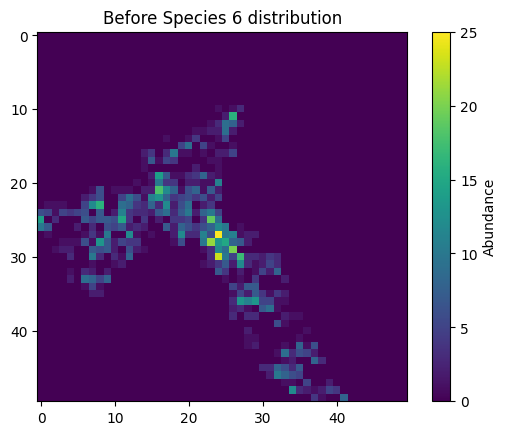

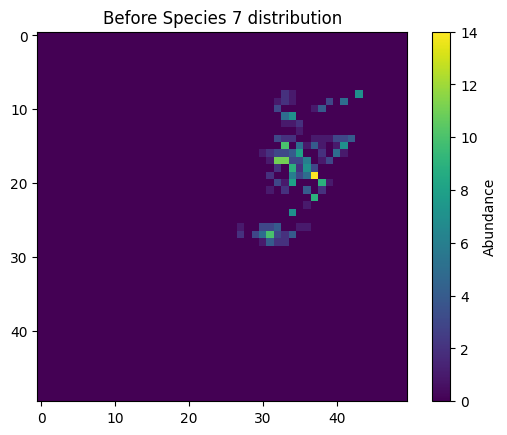

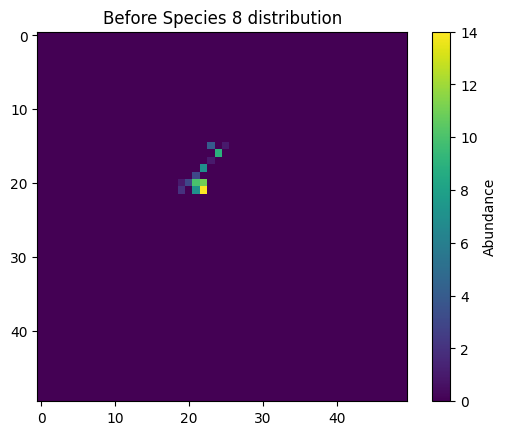

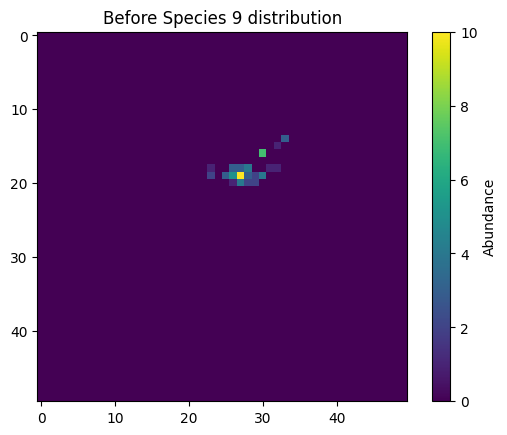

In [4]:
print("Before dynamics:")
for sp_id in range(env.n_species):
    plot_species_distribution(list_cells_before, env.grid_size, sp_id, title_prefix="Before")

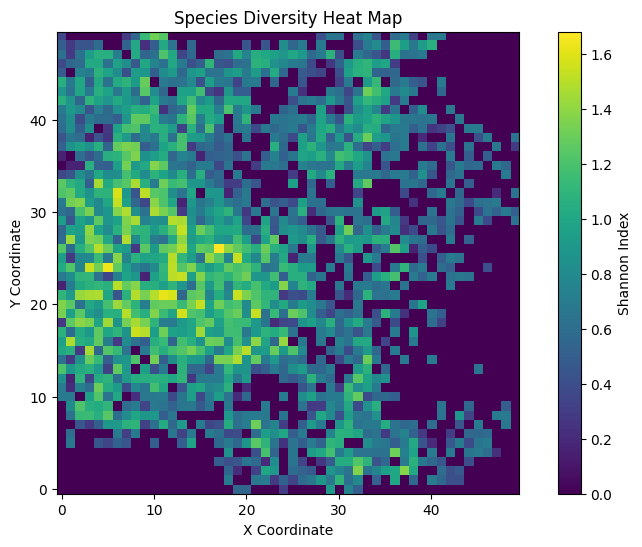

In [5]:
plot_biodiversity_map(list_cells_before)

In [6]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


In [7]:
for t in range(300):
    # 随机采样 actions
    actions = {}
    for aid in env.agent_ids:
        actions[aid] = env.action_spaces[aid].sample()
        # gym's Dict sample returns e.g. numpy types; convert to python types if needed
        if isinstance(actions[aid], dict) and "weights" in actions[aid]:
            actions[aid]["weights"] = np.array(actions[aid]["weights"], dtype=float)
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    if all(dones.values()):
        break

[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31247
Step 1/1000000
Corp 0: capital=98.00, biodiv=1.100, resilience=0.000
Corp 1: capital=118.00, biodiv=0.980, resilience=0.000
Corp 2: capital=97.00, biodiv=1.000, resilience=0.050
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.012, max: 30.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62469
Step 2/1000000
Corp 0: capital=135.57, biodiv=1.200, resilience=0.000
Corp 1: capital=134.06, biodiv=0.980, resilience=0.000
Corp 2: capital=166.37, biodiv=0.981, resilience=0.050
Investor 0: cash=0.00, portfolio=[0.3956782  0.16062222 0.44369958]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.024, max: 30.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 51659
Step 3/1000000
Corp 0: capital=160.57, biodiv=1.180, resilience=0.000
Corp 1: capital=159.06, biodiv=0.960, res

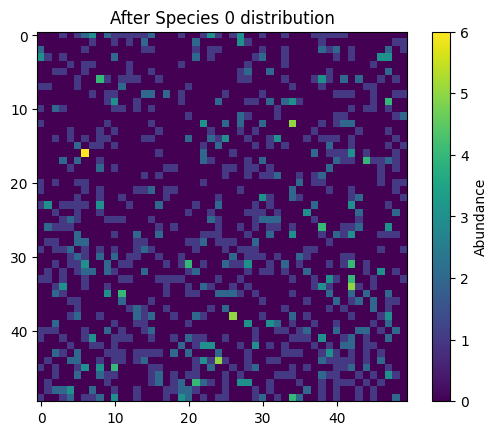

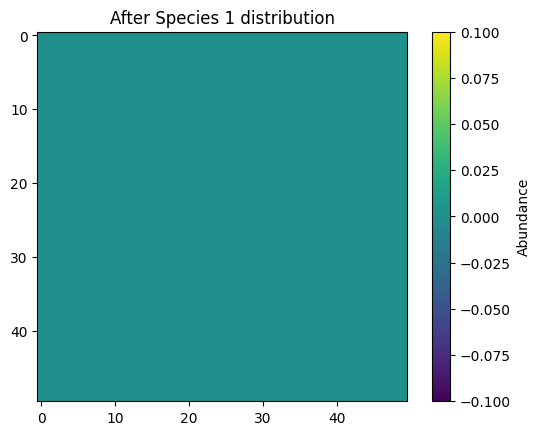

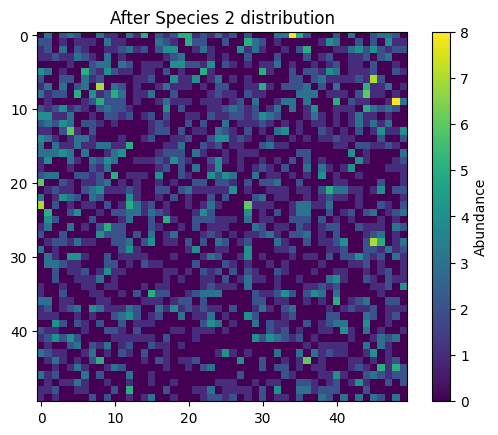

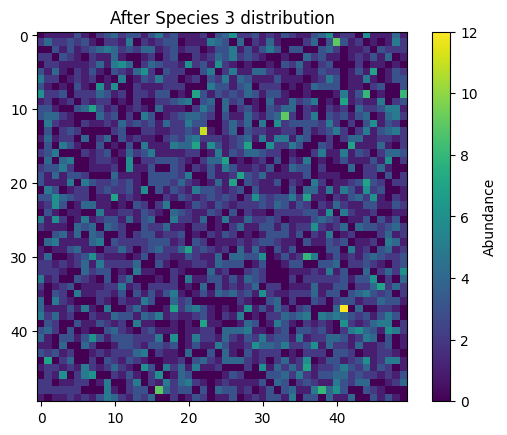

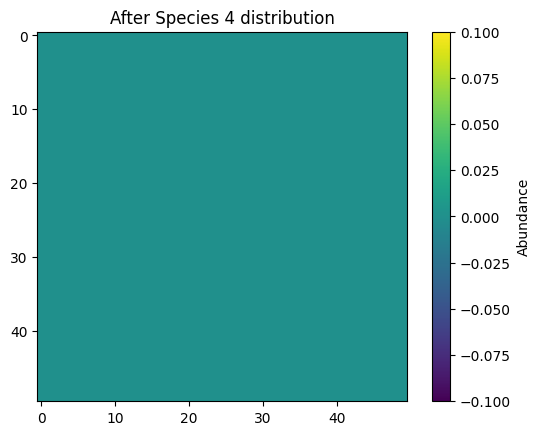

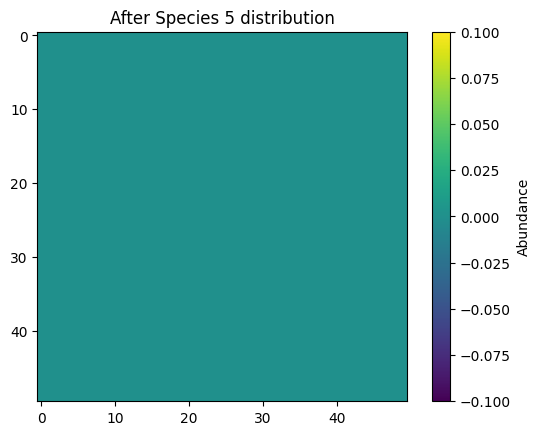

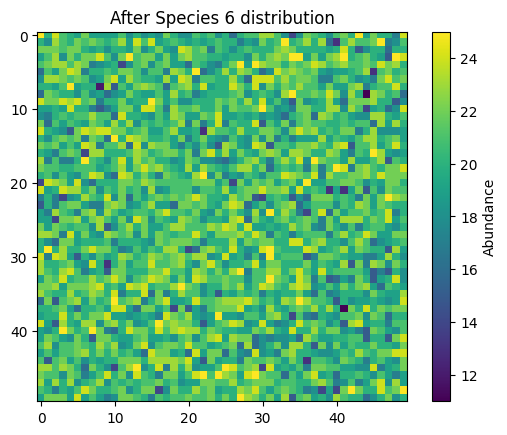

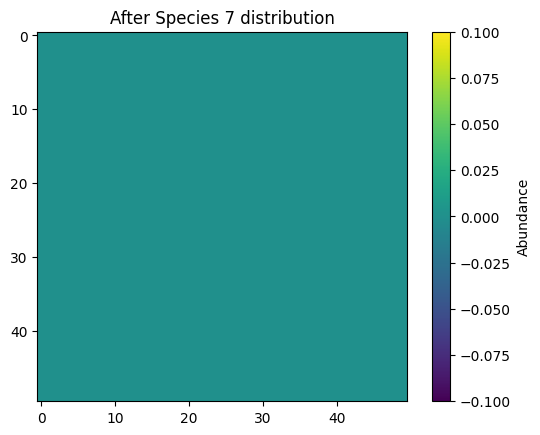

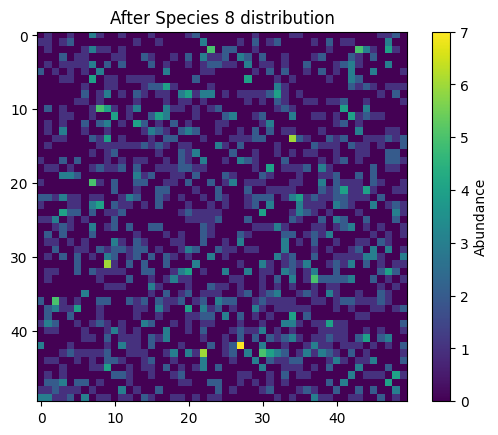

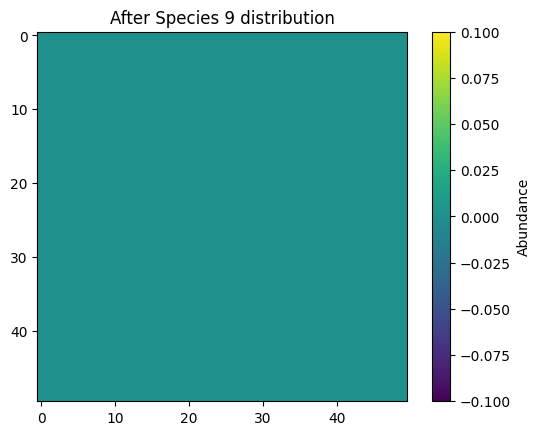

In [8]:
for sp_id in range(env.n_species):
    plot_species_distribution(env.list_cells, env.grid_size, sp_id, title_prefix="After")

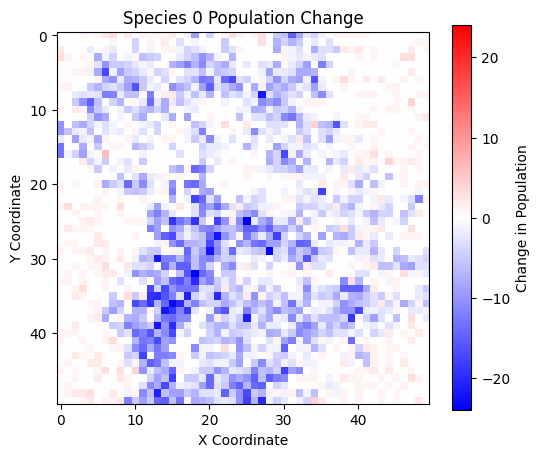

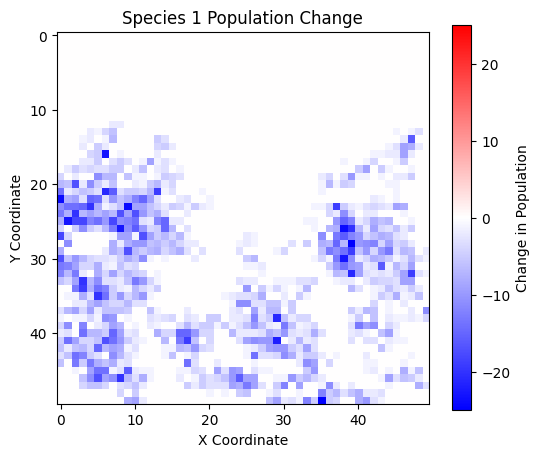

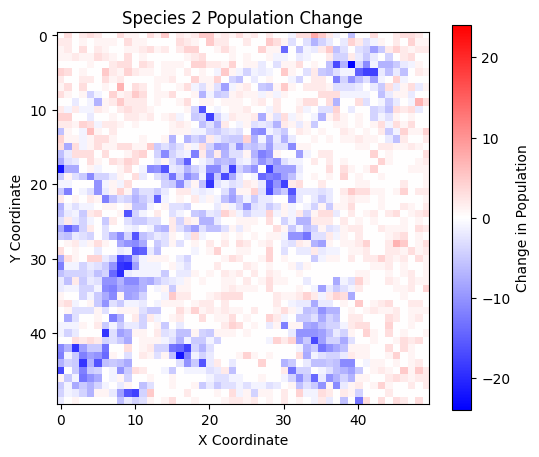

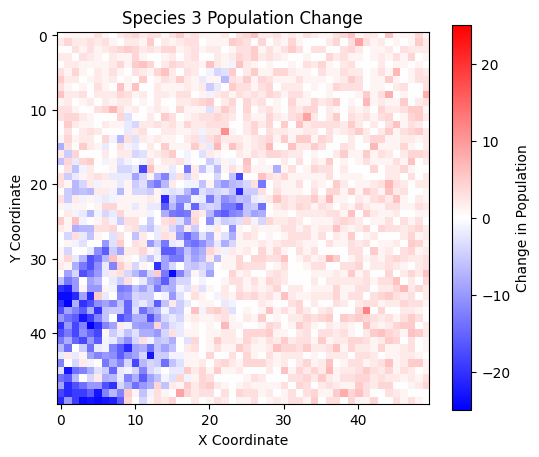

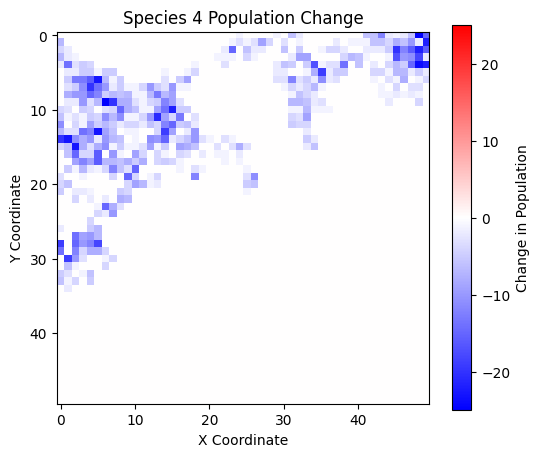

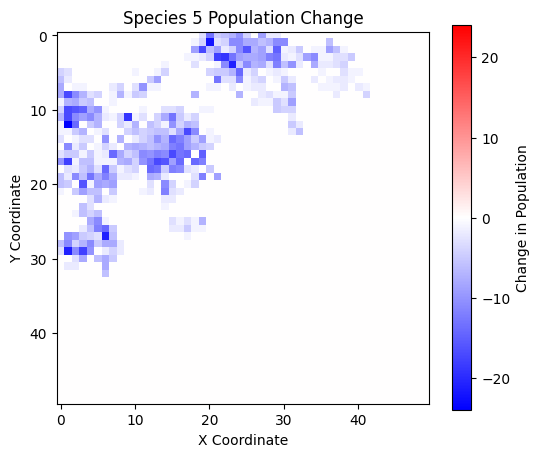

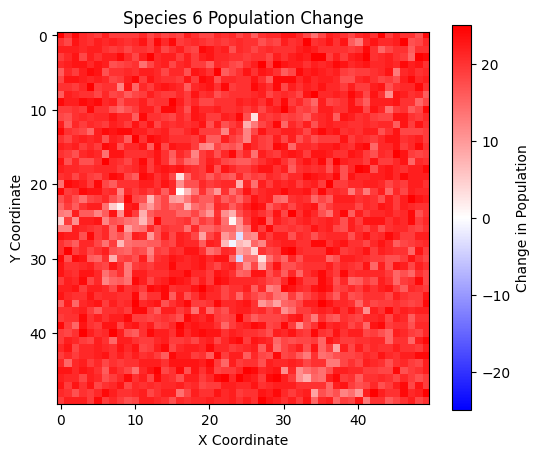

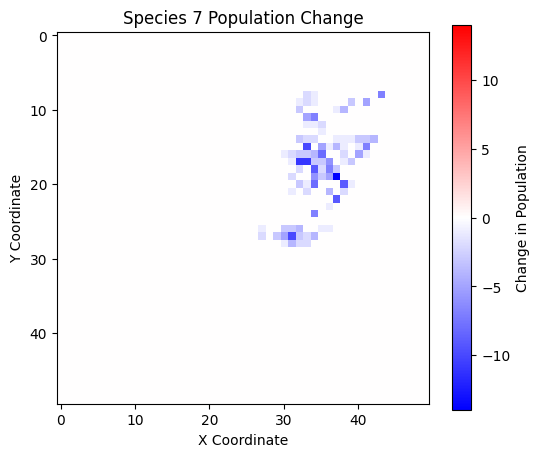

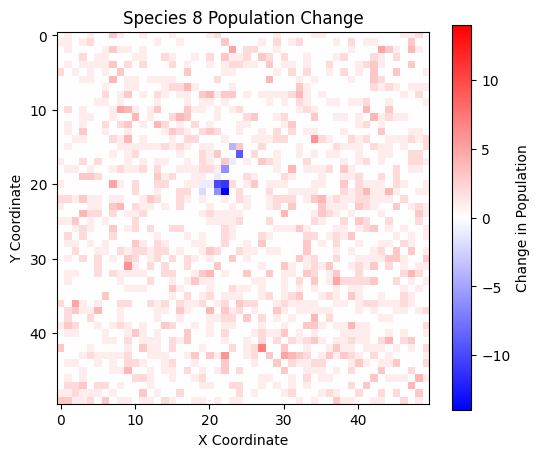

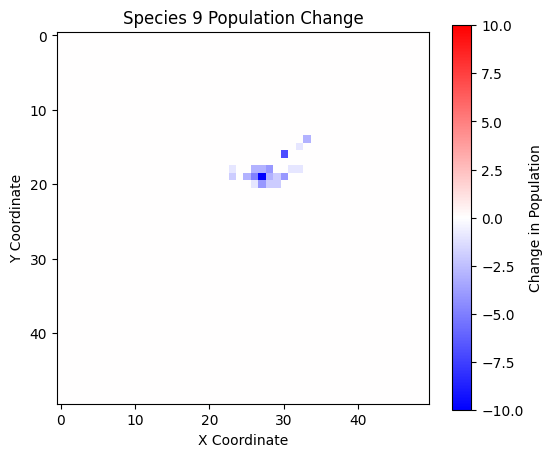

In [9]:
for sp_id in range(env.n_species):
    plot_species_difference(list_cells_before, env.list_cells, species_id=sp_id)

In [10]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 61733


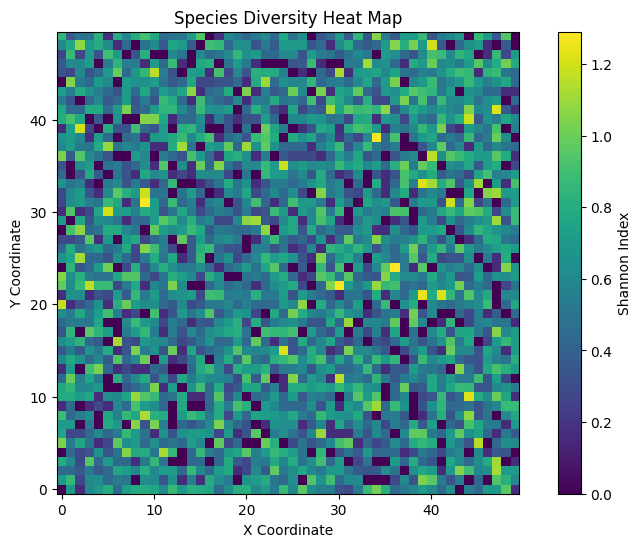

In [11]:
plot_biodiversity_map(env.list_cells)

In [12]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([1082.6326 ,    8.783  ,    2.9    ,    2.12352,   24.6932 ],
       dtype=float32),
 'corp_1': array([771.16284,   8.675  ,   3.2    ,   2.12352,  24.6932 ],
       dtype=float32),
 'corp_2': array([1244.2046 ,    8.096  ,    3.05   ,    2.12352,   24.6932 ],
       dtype=float32),
 'inv_0': array([0.0000000e+00, 1.9283144e-01, 4.4481638e-01, 3.6235219e-01,
        1.0826326e+03, 7.7116284e+02, 1.2442046e+03, 8.7830000e+00,
        8.6750002e+00, 8.0959997e+00], dtype=float32),
 'inv_1': array([0.0000000e+00, 3.9366269e-01, 2.0631640e-01, 4.0002093e-01,
        1.0826326e+03, 7.7116284e+02, 1.2442046e+03, 8.7830000e+00,
        8.6750002e+00, 8.0959997e+00], dtype=float32)}

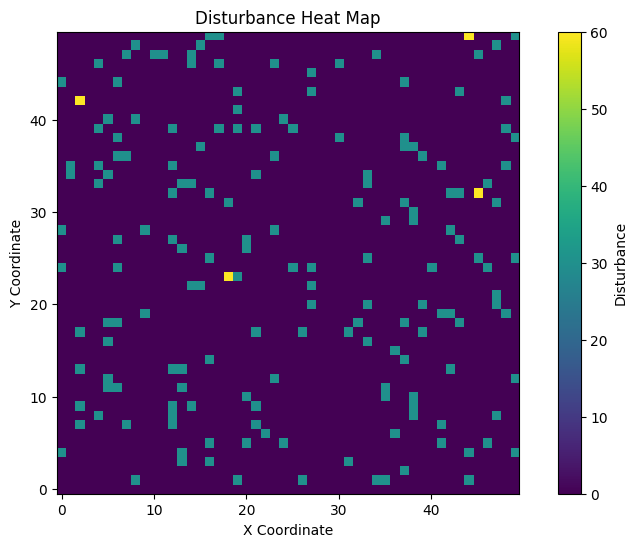

In [13]:
#plot disturbance of each cell in the grid
plot_disturbance_map(env.list_cells)

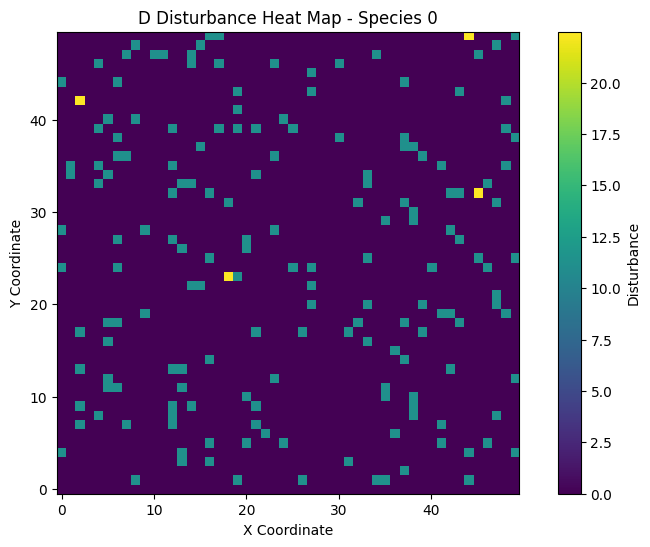

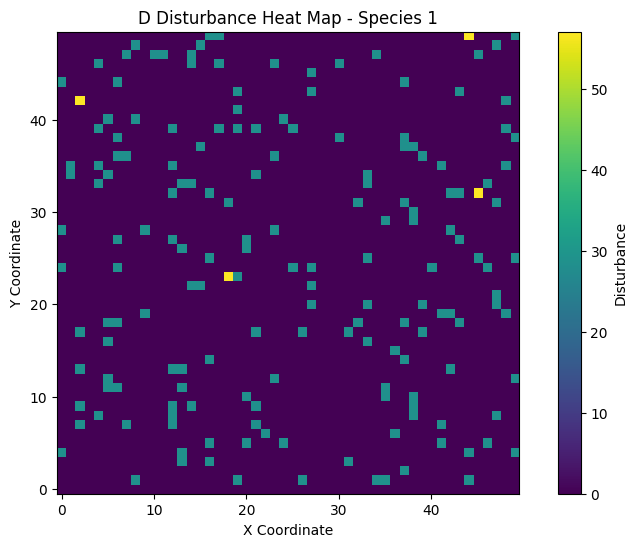

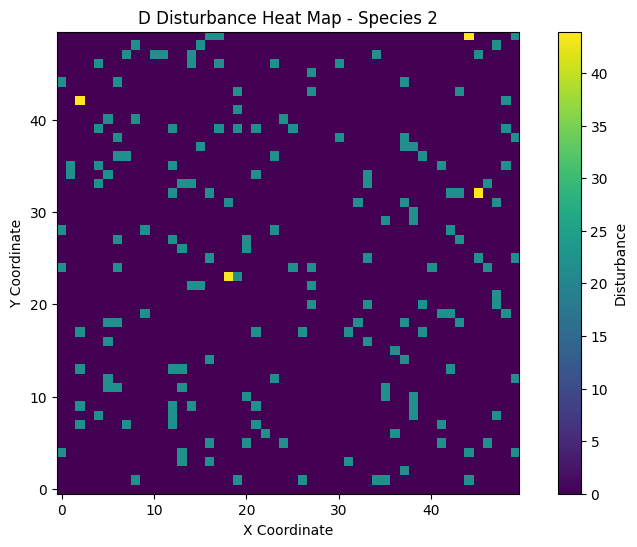

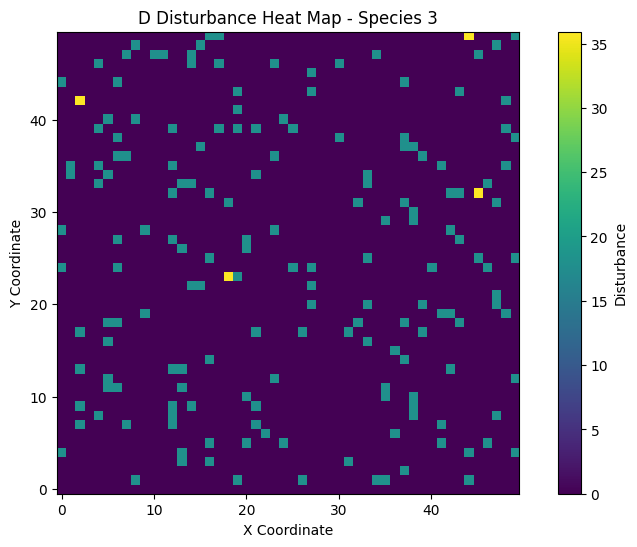

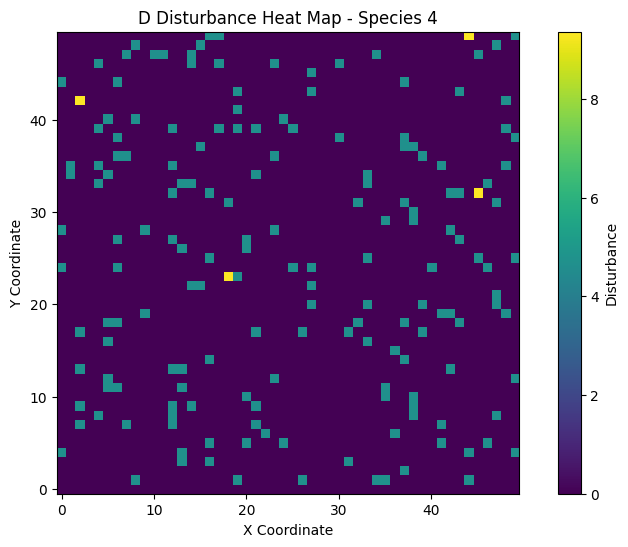

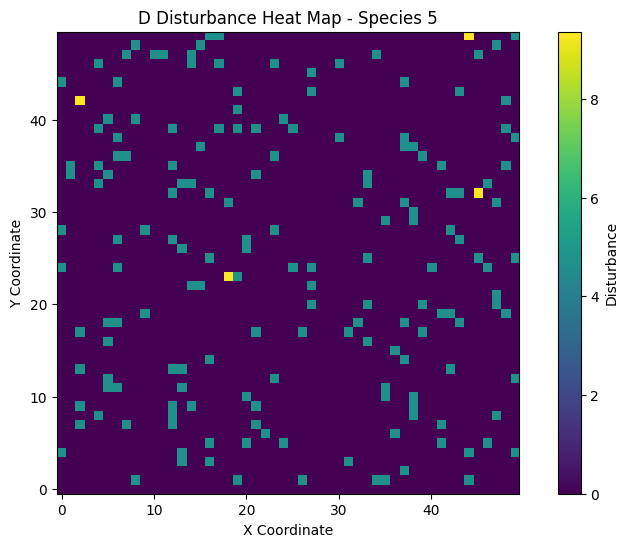

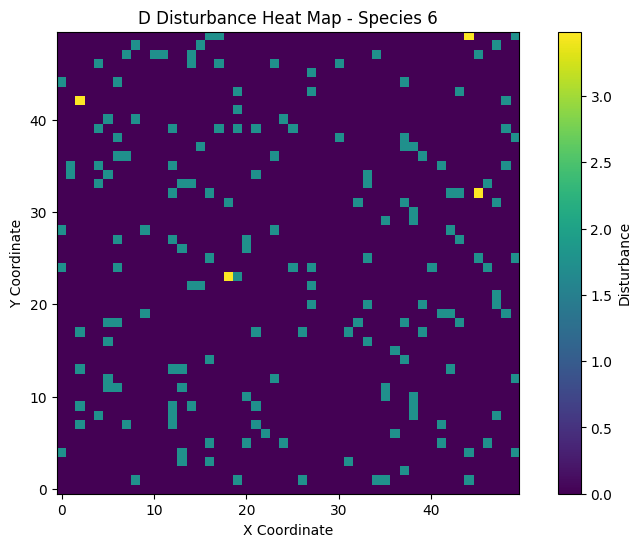

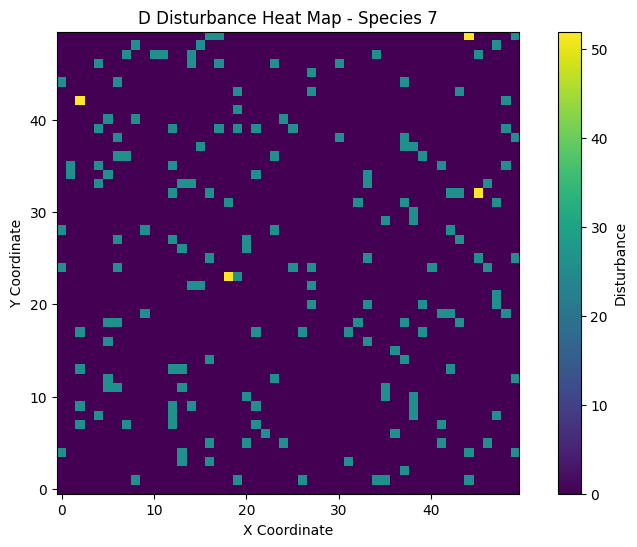

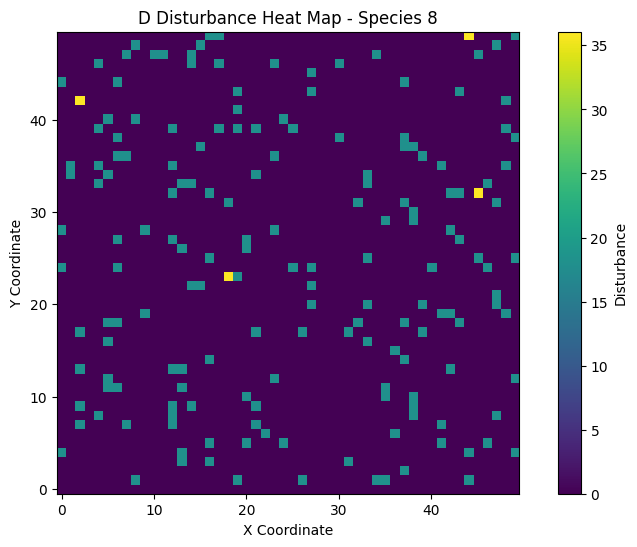

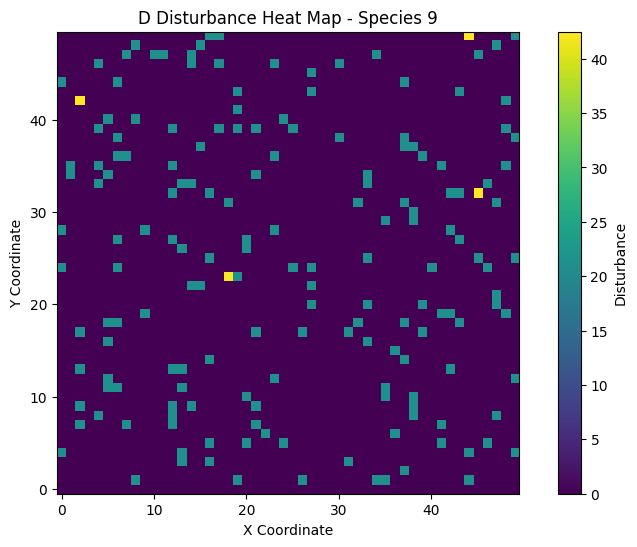

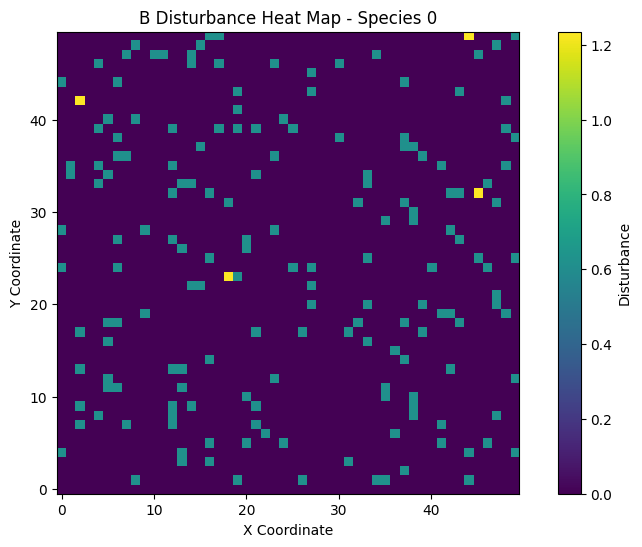

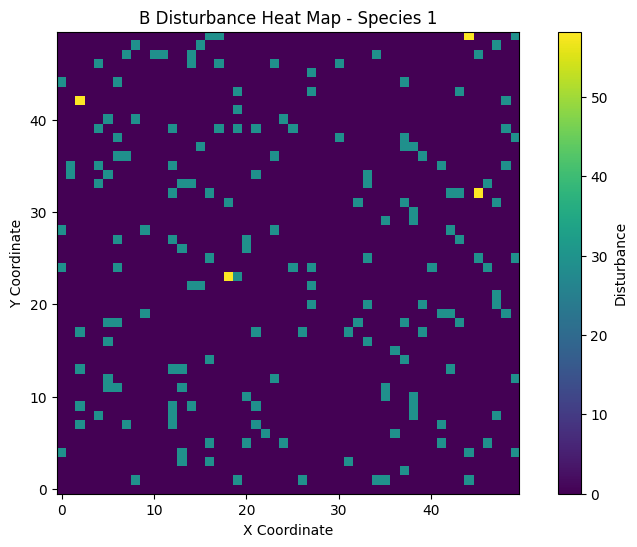

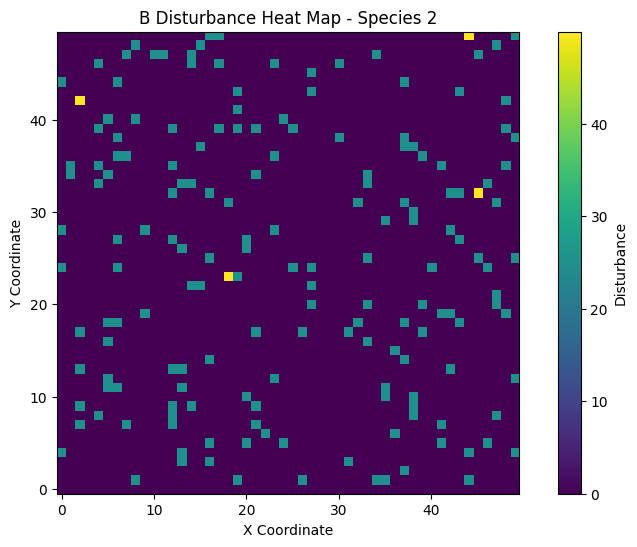

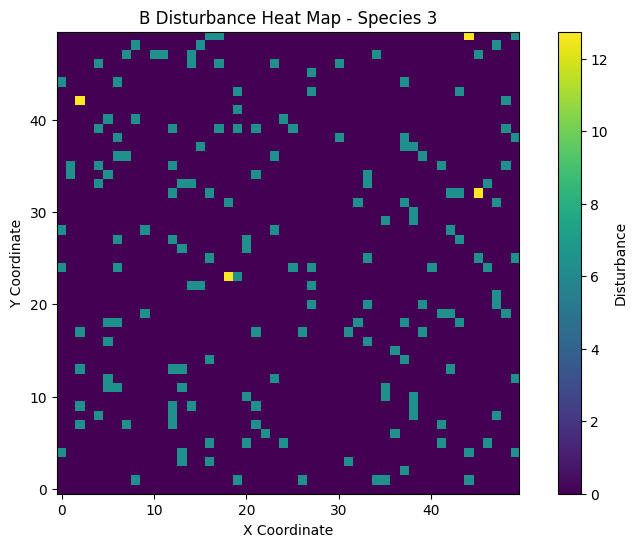

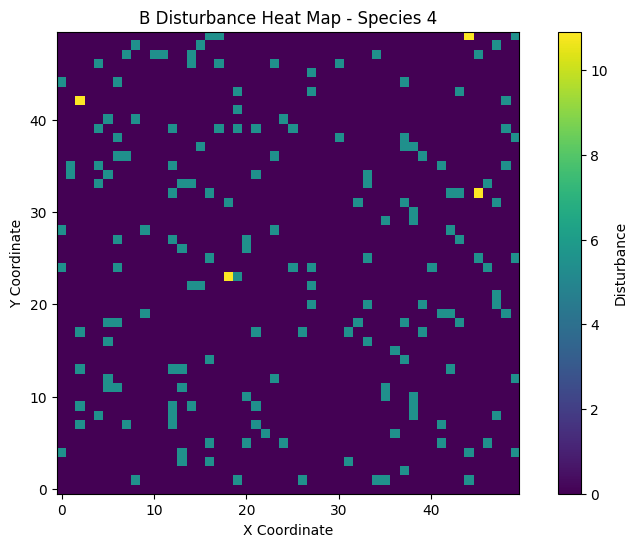

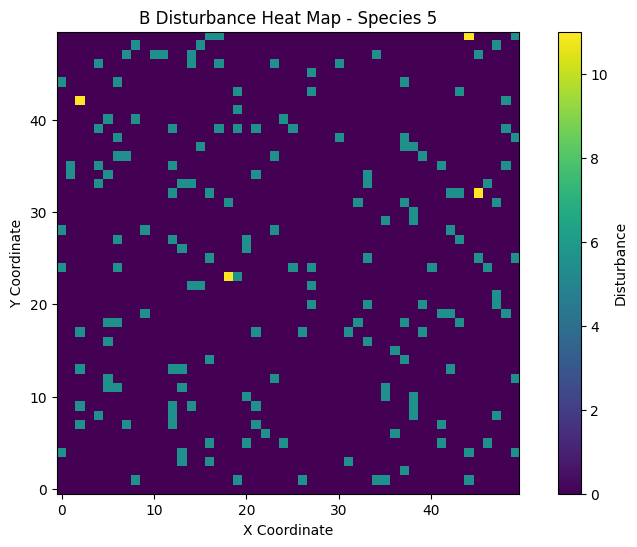

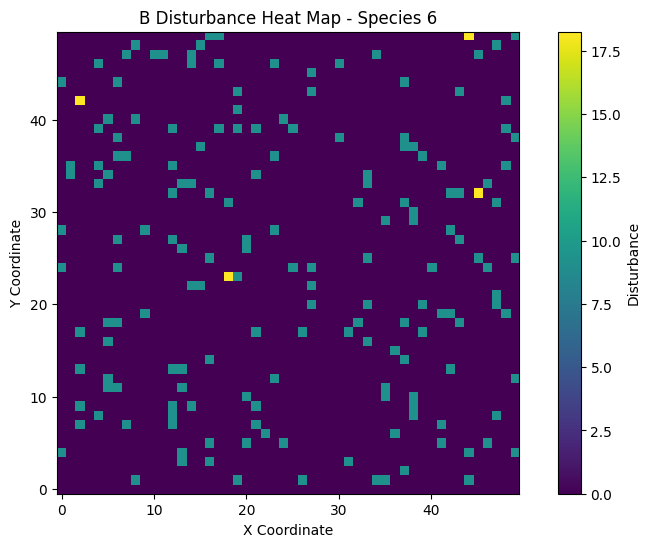

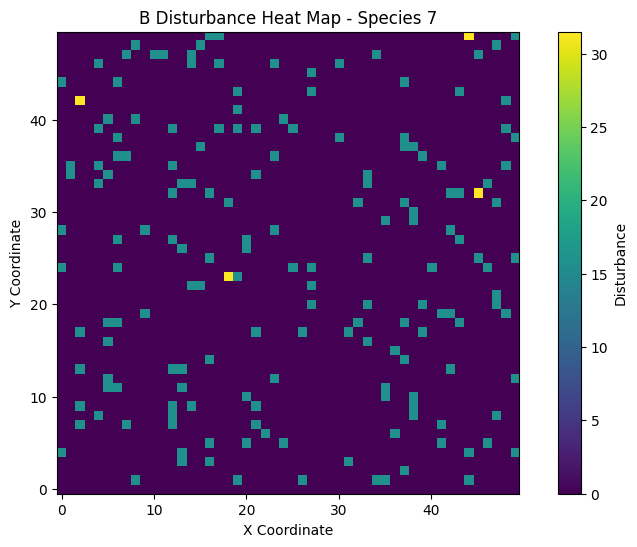

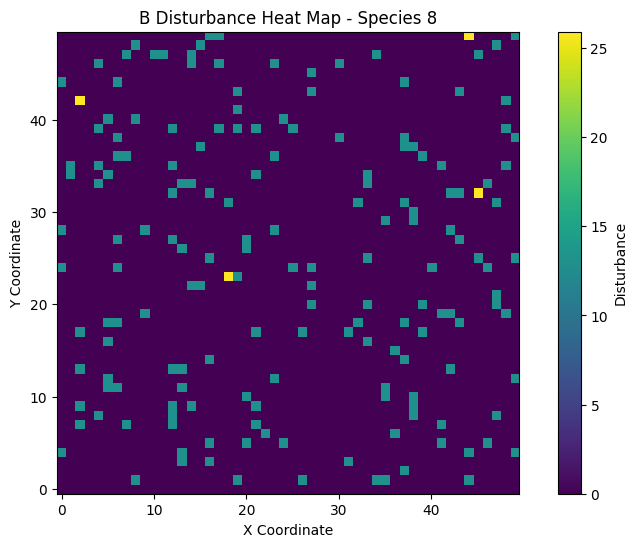

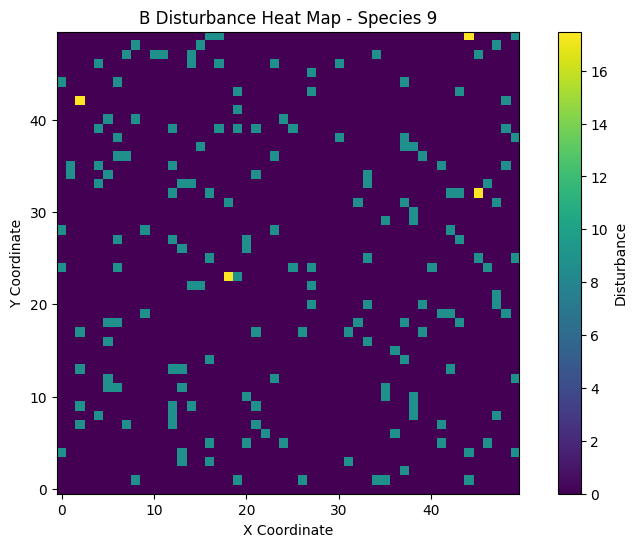

In [14]:
#plot D and B disturbance effects for each species
D_effect_matrix = env.sdyn.effect_of_D_exploitation
B_effect_matrix = env.sdyn.effect_of_B_exploitation

for sp_id in range(env.n_species):
    plt.figure(figsize=(10, 6))
    plt.imshow(D_effect_matrix[:, :, sp_id], cmap="viridis", origin="lower")
    plt.colorbar(label="Disturbance")
    plt.title(f"D Disturbance Heat Map - Species {sp_id}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()

for sp_id in range(env.n_species):
    plt.figure(figsize=(10, 6))
    plt.imshow(B_effect_matrix[:, :, sp_id], cmap="viridis", origin="lower")
    plt.colorbar(label="Disturbance")
    plt.title(f"B Disturbance Heat Map - Species {sp_id}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()
